# Project Summary

1) This project is done for INX Future Inc to umderstand the factors affecting the employee performance and exploring interesting facts about the dataset

2) To built a model using ML algorithm to predict employee performance

## Requirement

### Downloading the Required Python Packages

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Importing the raw data through Pandas

In [29]:
data=pd.read_csv(r'C:\Users\aravindhan\Desktop\IABAC Project\Employee_Performance.csv')

## Analysis

## We have below inferance on analyzing the data
### * The data has 1200 rows and 28 Features
### * The data has no null entries.
### * Out of 28 Features 9 features are Object variable and 19 are numerical variable
### * The co-relation matrix explains the features which have good co-relation with employee performance
### * Features like EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, EmpWorkLifeBalance have good positive co-relation
### * Features like YearsSinceLastPromotion, ExperienceYearsInCurrentRole have negative co-relation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [12]:
categorical_feature = data.dtypes==object

In [14]:
data.columns[categorical_feature].tolist()

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [15]:
Numerical_feature = data.dtypes!=object

In [17]:
data.columns[Numerical_feature].tolist()

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

### Encoding the Categorical variable to understand the co-relation with employee performance

In [24]:
le=LabelEncoder()
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

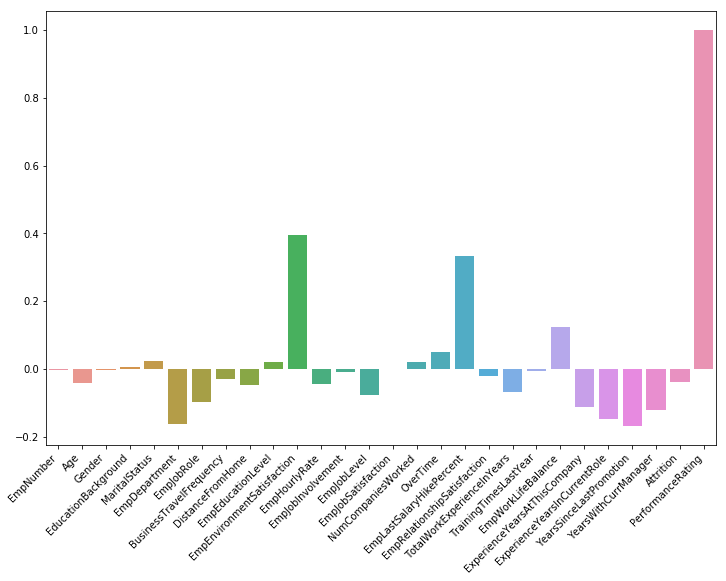

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=data.corr()['PerformanceRating'].index,y=data.corr()['PerformanceRating'].values)
plt.xticks(rotation=45, 
    horizontalalignment='right',
    fontweight='light', 
    )

In [34]:
data[data.columns[Numerical_feature]]

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,20,2,6,3,3,6,5,0,4,4
1196,37,10,2,4,80,4,1,4,3,17,1,4,2,3,1,0,0,0,3
1197,50,28,1,4,74,4,1,3,1,11,3,20,3,3,20,8,3,8,3
1198,34,9,3,4,46,2,3,2,1,14,2,9,3,4,8,7,7,7,3


In [32]:
list=data.columns[categorical_feature]

### The data looks clean and there is no requirement for data cleanup

In [33]:
for i in list:
    
    print(i,data[i].unique())

EmpNumber ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender ['Male' 'Female']
EducationBackground ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus ['Single' 'Married' 'Divorced']
EmpDepartment ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime ['No' 'Yes']
Attrition ['No' 'Yes']


## Exploratory data Analysis and data Visualization
#### around 70% of the employees are rated 3, the given data set is a biased dataset.
#### employees with EmpEnvironmentSatisfaction rating 1 and 2's performance is low
#### The box bot and distribution plot clearly defines the above inference
#### The mean rating of finance is lowest while the mean performance rating of development is lighest
#### Employees with good hike percentage have performed well, there could be possible that hike percentage is dependent variable of performance rating
#### The work force of development, R&D, sales contributes major portion of the workforce
#### R&D and Sales, Finance have high % of 2 performnace rated employees

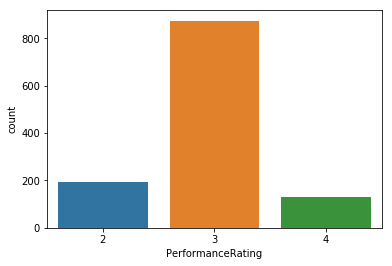

In [90]:
## the count plot on PerformanceRating shows that around more than 70 % of employees are rated 3  
tempdf=data.groupby(['PerformanceRating']).PerformanceRating.count()
sns.countplot(x='PerformanceRating',data=data)
percent=tempdf.values/tempdf.values.sum()

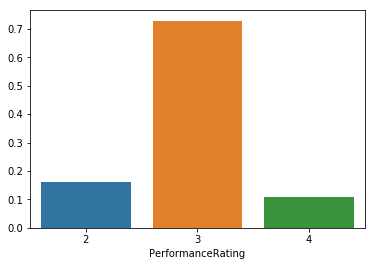

In [91]:
sns.barplot(x=tempdf.index,y=percent)

### Analyzing EmpEnvironmentSatisfaction

C:\Users\aravindhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


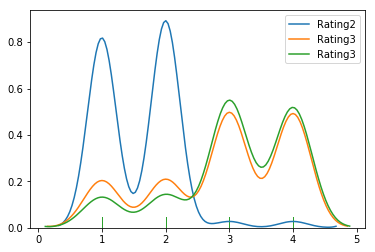

[2, 3, 4]

In [124]:
## It was clearly understood that employe's EmpEnvironmentSatisfaction rating plays a vital role in employee rating

data2=data[data['PerformanceRating']==2]
data3=data[data['PerformanceRating']==3]
data4=data[data['PerformanceRating']==4]

sns.distplot(data2[['EmpEnvironmentSatisfaction']], hist=False, rug=True,label='Rating2')
sns.distplot(data3[['EmpEnvironmentSatisfaction']], hist=False, rug=True,label='Rating3')
sns.distplot(data4[['EmpEnvironmentSatisfaction']], hist=False, rug=True,label='Rating3')
plt.show()
plt.legend

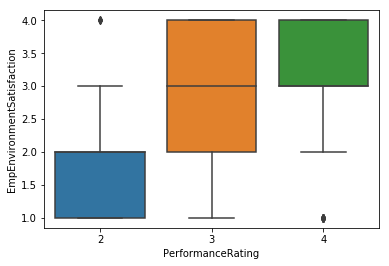

In [125]:
sns.boxplot(y='EmpEnvironmentSatisfaction',x='PerformanceRating',data=data)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

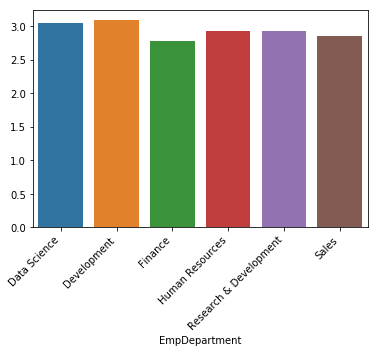

In [134]:
sns.barplot(x=data.groupby(['EmpDepartment']).PerformanceRating.mean().index,y=data.groupby(['EmpDepartment']).PerformanceRating.mean().values)
plt.xticks(rotation=45, 
    horizontalalignment='right',
    fontweight='light', 
    )

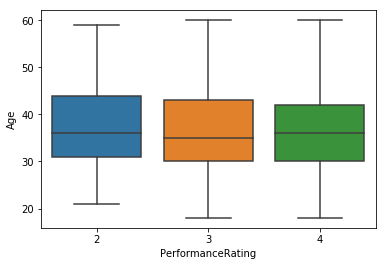

In [135]:
sns.boxplot(x='PerformanceRating',y='Age',data=data)

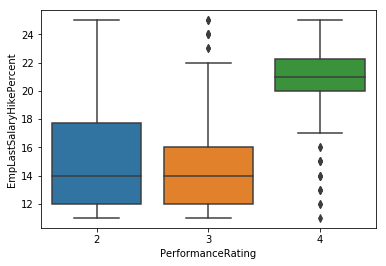

In [151]:
sns.boxplot(x=data.PerformanceRating,y=data.EmpLastSalaryHikePercent)

In [227]:
group=data.groupby(['EmpDepartment','PerformanceRating']).PerformanceRating.count()

In [171]:
group.xs('Data Science')

Int64Index([2, 3, 4], dtype='int64', name='PerformanceRating')

In [ ]:
f, a = plt.subplots(6,1,figsize=(15,30))

for i,z in zip(data.EmpDepartment.unique(),np.arange(6)):
    group.xs(i).plot(kind='bar',ax=a[z],title=i,fontsize='x-large')

In [214]:
group.index = group.index.set_names(['Dept', 'Rating'])

In [225]:
group.reset_index(drop=True,inplace=True)

In [232]:
data1=group.reset_index(name='data')

In [246]:
from matplotlib import pyplot

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 1080x504 with 0 Axes>

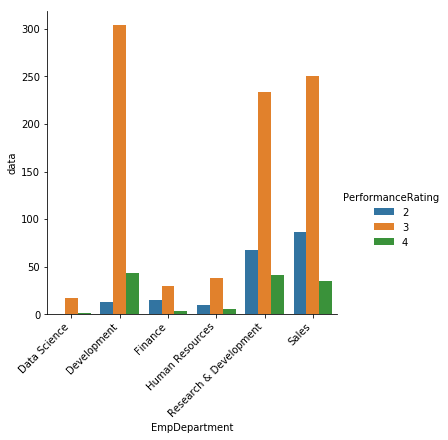

In [268]:
plt.figure(figsize=(15,7))
sns.catplot(x='EmpDepartment',y='data',hue='PerformanceRating',data=data1,kind='bar')
plt.xticks(rotation=45, 
    horizontalalignment='right',
    fontweight='light', 
    )

In [233]:
data1.columns

Index(['EmpDepartment', 'PerformanceRating', 'data'], dtype='object')

In [203]:
data['EmpLastSalaryHikePercent'].unique()

array([12, 21, 15, 14, 13, 23, 11, 20, 19, 17, 18, 22, 16, 24, 25],
      dtype=int64)

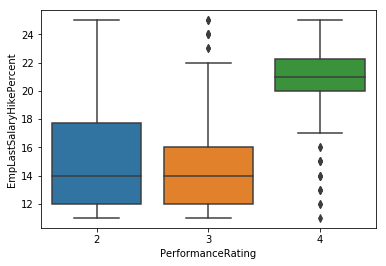

In [204]:
sns.boxplot(x='PerformanceRating',y='EmpLastSalaryHikePercent',data=data)

C:\Users\aravindhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


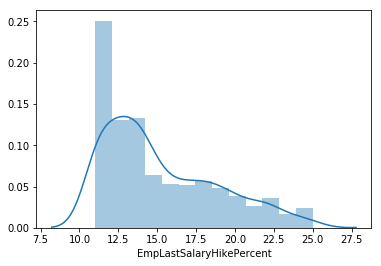

In [206]:
sns.distplot(data['EmpLastSalaryHikePercent'])

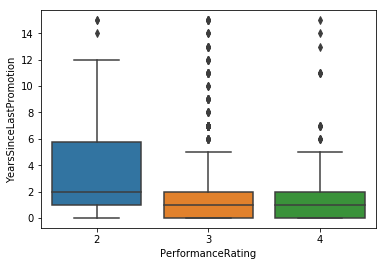

In [205]:
sns.boxplot(x='PerformanceRating',y='YearsSinceLastPromotion',data=data)

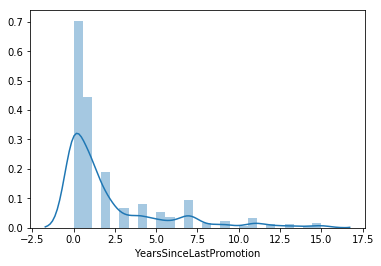

In [207]:
sns.distplot(data['YearsSinceLastPromotion'])

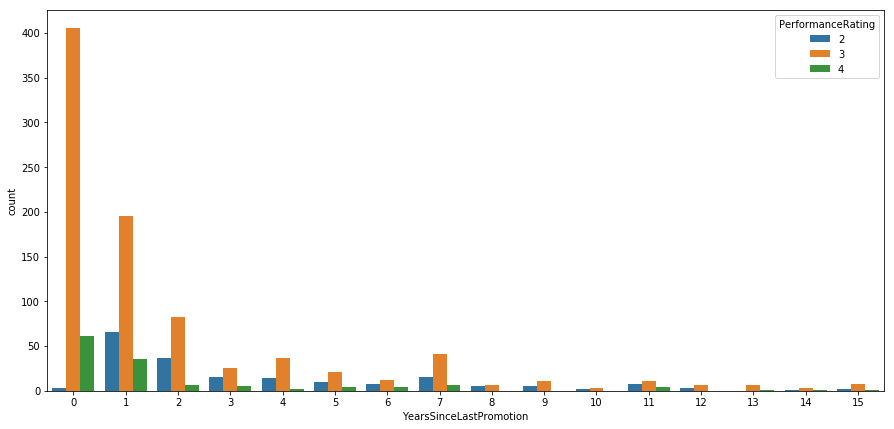

In [267]:
plt.figure(figsize=(15,7))
sns.countplot(x='YearsSinceLastPromotion',data=data,hue='PerformanceRating')

In [211]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')